# Scene: Construction

TODO WIP

## Creating Objects

### Scene

In [1]:
from robotodo.engines.isaac.scene import Scene

scene = Scene.load(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/default_environment.usd",
)


|---------------------------------------------------------------------------------------------|
| Driver Version: 535.247.01    | Graphics API: Vulkan
|=============================================================================================|
| GPU | Name                             | Active | LDA | GPU Memory | Vendor-ID | LUID       |
|     |                                  |        |     |            | Device-ID | UUID       |
|     |                                  |        |     |            | Bus-ID    |            |
|---------------------------------------------------------------------------------------------|
| 0   | NVIDIA GeForce RTX 3090          | Yes: 0 |     | 24576   MB | 10de      | 0          |
|     |                                  |        |     |            | 2204      | 3b061d17.. |
|     |                                  |        |     |            | 1         |            |
|===============================================================================

2025-12-03T06:55:35Z [2,213ms] [Error] [omni.syntheticdata.scripts.extension] SyntheticData extension needs at least a stageFrameHistoryCount of 3


Warp 1.8.2 initialized:
   CUDA Toolkit 12.8, Driver 12.2
   Devices:
     "cpu"      : "CPU"
     "cuda:0"   : "NVIDIA GeForce RTX 3090" (24 GiB, sm_86, mempool enabled)
   Kernel cache:
     /home/sysadmin/.cache/warp/1.8.2
Warp DeprecationWarning: The `warp.sim` module is deprecated and will be removed in v1.10. Please transition to using the forthcoming Newton library instead.


2025-12-03T06:55:37Z [4,378ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-12-03T06:55:37Z [4,378ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-12-03T06:55:37Z [4,482ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


In [2]:
scene.viewer.show()
# TODO instruct users to try either options
scene.viewer.mode = "editing"
# scene.viewer.mode = "viewing"

extension omni.kit.widget.cache_indicator-3.0.6 has a [python.pipapi] entry, but use_online_index=true is not set. It doesn't do anything and can be removed.


### Regular Objects

Analytical geometries

In [3]:
from robotodo.utils.geometry import Box
from robotodo.engines.isaac.body import Body, BodySpec, BodyKind

box = Body.create(
    "/World/Box",
    scene=scene,
    spec=BodySpec(
        kind=BodyKind.RIGID,
        geometry=Box(size=[.1, .1, .1]), 
    ),    
)

USD assets

In [4]:
from robotodo.utils.pose import Pose
from robotodo.engines.isaac.body import RigidBody

mug = RigidBody.load(
    "/World/Mug",
    source="https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Props/Mugs/SM_Mug_A2.usd",
    scene=scene,
)

mug.collision.enabled = True
mug.pose = Pose(p=[.5, .5, .5])
mug

RigidBody(['/World/Mug'], scene=Scene())

In [5]:
mug.kind

array([-1])

In [6]:
mug.path

['/World/Mug']

In [7]:
mug.geometry

[[PolygonMesh(vertices=array([[-9.7094946e-15,  7.4163895e+00,  6.7009239e+00],
         [-1.0514517e-14,  6.7984734e+00,  7.3910751e+00],
         [-8.9676420e-15,  7.7149429e+00,  6.1962776e+00],
         ...,
         [ 2.6579094e+00, -2.0071621e+00,  2.2888184e-05],
         [ 2.8316746e+00, -1.7532892e+00,  2.4199486e-05],
         [ 2.9813328e+00, -1.4845438e+00,  2.4676323e-05]], dtype=float32), face_vertex_counts=array([3, 3, 3, ..., 3, 3, 3], dtype=int32), face_vertex_indices=array([ 131,  490,    0, ..., 2641, 2555, 2556], dtype=int32), transform=array([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]))]]

In [8]:
mug.viewer.show()

In [9]:
mug.material

/home/sysadmin/lab/robotodo/packages/robotodo/engines/isaac/body.py:311: UserWarning: USD prim does not have a material applied: Usd.Prim(</World/Mug>)
  warnings.warn(f"USD prim does not have a material applied: {prim}")


Material([None], scene=Scene())

In [10]:
from robotodo.engines.isaac.body import DeformableBody

weird_mug = DeformableBody.create("/World/Mug", scene=scene)

/home/sysadmin/lab/robotodo/packages/robotodo/engines/isaac/_kernel.py:279: UserWarning: Deformable Schema Beta was requested to be enabled in Omniverse. It has now been enabled (Restart may be required for the changes to take effect). For details see https://docs.omniverse.nvidia.com/kit/docs/omni_physics/107.3/dev_guide/deformables_beta/deformable_authoring.html#enable-deformable-schema-beta
  warnings.warn(


In [11]:
weird_mug.viewer.show()

### Robots (Articulations)

In [12]:
from robotodo.engines.isaac.articulation import Articulation

panda = Articulation.load(
    "/World/Panda",
    source="https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Robots/FrankaRobotics/FrankaPanda/franka.usd",
    scene=scene,
)
panda

Articulation(['/World/Panda'], scene=Scene())

In [13]:
panda.links

{'panda_link0': Body(['/World/Panda/panda_link0'], scene=Scene()),
 'panda_link1': Body(['/World/Panda/panda_link1'], scene=Scene()),
 'panda_link2': Body(['/World/Panda/panda_link2'], scene=Scene()),
 'panda_link3': Body(['/World/Panda/panda_link3'], scene=Scene()),
 'panda_link4': Body(['/World/Panda/panda_link4'], scene=Scene()),
 'panda_link5': Body(['/World/Panda/panda_link5'], scene=Scene()),
 'panda_link6': Body(['/World/Panda/panda_link6'], scene=Scene()),
 'panda_link7': Body(['/World/Panda/panda_link7'], scene=Scene()),
 'panda_hand': Body(['/World/Panda/panda_hand'], scene=Scene()),
 'panda_leftfinger': Body(['/World/Panda/panda_leftfinger'], scene=Scene()),
 'panda_rightfinger': Body(['/World/Panda/panda_rightfinger'], scene=Scene())}

In [14]:
panda.joints

{'panda_joint1': Joint['panda_joint1'](['/World/Panda/panda_link0/panda_joint1'], scene=Scene()),
 'panda_joint2': Joint['panda_joint2'](['/World/Panda/panda_link1/panda_joint2'], scene=Scene()),
 'panda_joint3': Joint['panda_joint3'](['/World/Panda/panda_link2/panda_joint3'], scene=Scene()),
 'panda_joint4': Joint['panda_joint4'](['/World/Panda/panda_link3/panda_joint4'], scene=Scene()),
 'panda_joint5': Joint['panda_joint5'](['/World/Panda/panda_link4/panda_joint5'], scene=Scene()),
 'panda_joint6': Joint['panda_joint6'](['/World/Panda/panda_link5/panda_joint6'], scene=Scene()),
 'panda_joint7': Joint['panda_joint7'](['/World/Panda/panda_link6/panda_joint7'], scene=Scene()),
 'panda_hand_joint': Joint['panda_hand_joint'](['/World/Panda/panda_link7/panda_hand_joint'], scene=Scene()),
 'panda_finger_joint1': Joint['panda_finger_joint1'](['/World/Panda/panda_hand/panda_finger_joint1'], scene=Scene()),
 'panda_finger_joint2': Joint['panda_finger_joint2'](['/World/Panda/panda_hand/panda_f

In [15]:
# TODO
# panda.viewer.show()

In [16]:
panda.dof_names

['panda_joint1',
 'panda_joint2',
 'panda_joint3',
 'panda_joint4',
 'panda_joint5',
 'panda_joint6',
 'panda_joint7',
 'panda_finger_joint1',
 'panda_finger_joint2']

In [17]:
panda.dof_positions

tensor([[ 1.1952e-02, -5.6824e-01,  1.2265e-05, -2.8113e+00,  1.7285e-04,
          3.0364e+00,  7.4084e-01,  0.0000e+00,  0.0000e+00]])

In [18]:
panda.driver.dof_stiffnesses

tensor([[22918.3125, 22918.3125, 22918.3125, 22918.3125, 22918.3125, 22918.3125,
         22918.3125,   400.0000,     0.0000]])

In [19]:
panda.driver.dof_target_positions

tensor([[ 0.0120, -0.5700,  0.0000, -2.8100,  0.0000,  3.0370,  0.7410,  0.0000,
          0.0000]])

### Sensors

In [20]:
from robotodo.engines.isaac.sensor import Camera

In [21]:
cam = Camera.create("/World/Camera", scene=scene)

In [22]:
cam.viewer.show()

In [23]:
await cam.read_rgba((2, 2))

tensor([[[[  0,   0,   0, 255],
          [  0,   0,   0, 255]],

         [[  0,   0,   0, 255],
          [  0,   0,   0, 255]]]], device='cuda:0', dtype=torch.uint8)

In [24]:
# TODO
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=[0, 0, 0])
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=robot_panda.link_poses[..., -1].p)
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=mug.pose.p)
cam.pose = Pose.from_lookat([2, 2, 2], p_target=[0, 0, 0])
cam.viewer.show()

## Interacting with Objects

In [25]:
scene.viewer.show()

Auto stepping

In [26]:
scene.autostepping

False

In [27]:
scene.autostepping = True

Manual stepping

0.016666666666666666

2025-12-03T06:54:20Z [16,867ms] [Error] [omni.physx.plugin] PhysX error: Deformable surface contact buffer overflow detected, please increase PxGpuDynamicsMemoryConfig::maxDeformableSurfaceContacts to at least 1048576
, FILE /builds/omniverse/physics/physx/source/gpusimulationcontroller/src/PxgFEMClothCore.cpp, LINE 611


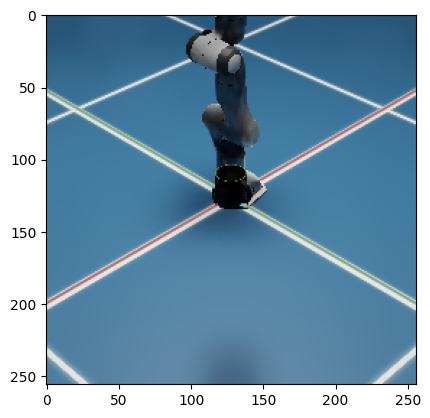

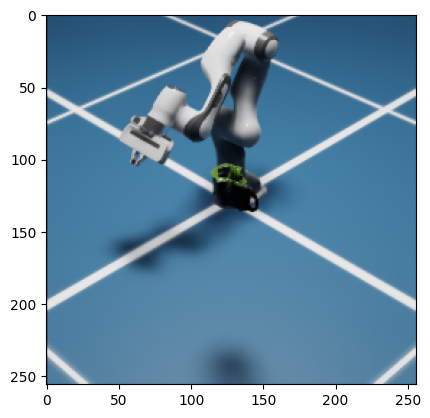

In [28]:
await scene.step()

TODO instruct users to play with the UI